In [2]:
import os
import cv2 as cv
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential     # Creamos una red paso a paso. (Crear la arquitectura global)
from keras.layers import Conv2D         # Creamos capas de convolucion 2D.
from keras.layers import MaxPooling2D
from keras.layers import MaxPool2D# Creamos capas de reduccion.
from keras.layers import Flatten        # Aplanado u ordenamiento de los datos.
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, History
from keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [46]:
#2
#import os
#Loading the datasets
train_path = "/kaggle/input/planets-dataset/planet/planet/train_classes.csv"
test_path = '/kaggle/input/planets-dataset/planet/planet/sample_submission.csv'
train_images = '/kaggle/input/planets-dataset/planet/planet/train-jpg'
test_images = '/kaggle/input/planets-dataset/planet/planet/test-jpg'
test_additional='/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional'

In [4]:
#3
train_label = pd.read_csv(train_path)
print(train_label.shape)
train_label.head()

(40479, 2)


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
#4
test_df = pd.read_csv(test_path)
print(test_df.shape)
test_df.head()

(61191, 2)


,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water


In [82]:
#5
list1 = os.listdir(train_images)
np.size(list1)



40479

In [7]:
# 6
train_img=[]
for i in list1:
    im=cv.imread('/kaggle/input/planets-dataset/planet/planet/train-jpg/'+i)
    img = cv.resize(im,(64,64))#,cv2.INTER_AREA)
    train_img.append(img)
#train_img= train_img / 255.0
train_img = np.array(train_img, np.float16) / 255.0
len(train_img)




40479

In [149]:
#train_img

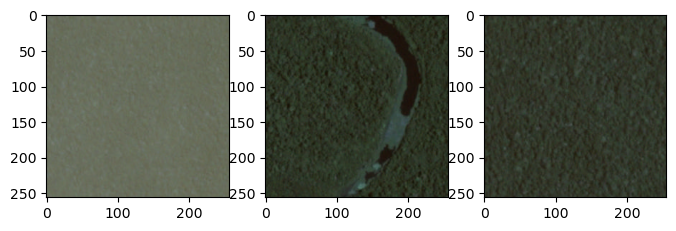

In [72]:
#5
from keras.preprocessing.image import ImageDataGenerator
import cv2 as cv


plt.figure(figsize=(8, 5))
plt.subplot(1,3,1)
img = cv.imread("/kaggle/input/planets-dataset/planet/planet/train-jpg/train_0.jpg")
plt.imshow(img)

plt.subplot(1,3,2)
img2=cv.imread("/kaggle/input/planets-dataset/planet/planet/train-jpg/train_10010.jpg")
plt.imshow(img2)

plt.subplot(1,3,3)
img3=cv.imread("/kaggle/input/planets-dataset/planet/planet/train-jpg/train_16113.jpg")
plt.imshow(img3)




In [9]:
#7
dummies=train_label['tags'].str.get_dummies(sep = ' ')
new_train_label = pd.concat([train_label,dummies ], axis="columns")
new_train_label.head(5)

,image_name,tags,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0,haze primary,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,train_1,agriculture clear primary water,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,train_2,clear primary,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,train_3,clear primary,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,train_4,agriculture clear habitation primary road,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0


In [10]:
#7
def extension_train_data(x):
     return str(x)+".jpg"


new_train_label['image_name'] = new_train_label['image_name'].apply(extension_train_data)

In [49]:
new_train_label.head(5)

,image_name,tags,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,train_0.jpg,haze primary,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,train_1.jpg,agriculture clear primary water,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,train_2.jpg,clear primary,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,train_3.jpg,clear primary,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,train_4.jpg,agriculture clear habitation primary road,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0


In [11]:
#8
#columns=list(new_train_label.columns[2:])
columns=new_train_label.columns[2:].tolist()
columns

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [68]:
#9
train_lab=new_train_label[columns]
train_lab = np.array(train_lab, np.uint8)

40479

In [20]:
#x_train

In [34]:
#x_train, x_val, y_train, y_val = train_test_split(train_img,train_lab, test_size = 0.2, shuffle = True, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(train_img,train_lab, test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
#x_train

In [14]:

# Prints the shape of the training and validation data.
print("Train data shape:",x_train.shape)
print("Train label shape:",y_train.shape)

print("Validation data shape:",x_val.shape)
print("Validation label shape:",y_val.shape)


Train data shape: (32383, 64, 64, 3)
Train label shape: (32383, 17)
Validation data shape: (8096, 64, 64, 3)
Validation label shape: (8096, 17)


In [73]:
#train_datagen = ImageDataGenerator(rescale = 1./255., validation_split = 0.2)
#test_datagen = ImageDataGenerator(rescale=1./255)
# Generating train data generator 
#train_generator = train_datagen.flow_from_dataframe(dataframe=new_train_label,
                                                    #directory = train_images, 
                                                    #x_col='image_name', y_col=columns, subset='training', 
                                                    3batch_size=32,seed=2021, shuffle=True, 
                                                    #validate_filenames=False,
                                                    #class_mode='multi_output', target_size=(64,64))

#generating validation data which is expected to be 20% of the train dataset since validation split is 0.2
#val_generator = train_datagen.flow_from_dataframe(dataframe=new_train_label,
                                                  #directory =train_images, 
                                                  #x_col='image_name', y_col=columns, subset='validation', 
                                                  #batch_size=32,seed=42, shuffle=True,
                                                  #validate_filenames=False,
                                                  #class_mode='raw', target_size=(64,64))

Found 32384 validated image filenames.
Found 8095 validated image filenames.


## cnn

In [39]:
#model
classifier = Sequential()
#classifier.add(BatchNormalization(input_shape=(64, 64, 3)))
classifier.add(Conv2D(filters = 32, # Features maps.
                      kernel_size = (3, 3),
                      input_shape = (64, 64, 3),
                      padding='same',
                      activation = "relu"))
classifier.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
#classifier.add(Dropout(0.2))

classifier.add(Conv2D(filters = 64,
                      kernel_size = (3, 3),
                      input_shape = (64, 64, 3), 
                      padding='same',
                      activation = "relu"))
classifier.add(Conv2D(64, kernel_size=(3, 3),  activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(filters = 128,
                      kernel_size = (3, 3),
                      input_shape = (64, 64, 3), 
                      padding='same',
                      activation = "relu"))
classifier.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.2))


classifier.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape = (64, 64, 3),  padding='same', activation='relu'))
classifier.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))


classifier.add(Flatten())

classifier.add(Dense(units = 512, activation = "relu")) # Comenzar con 56 -> oo
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 17, activation = "softmax")) #"sigmoid" "softmax"

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
#tf.keras.optimizers.Adam(learning_rate=0.01)

classifier.compile(optimizer = optimizer, loss = "categorical_crossentropy", 
                   metrics = ["accuracy"]) #"categorical_accuracy"
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_61 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

In [19]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [127]:
class_series = np.argmax(y_train, axis=1)

In [143]:
class_labels = np.unique(class_series)
class_labels

numpy.int64

In [144]:
#class weight didn't work
#from sklearn.utils.class_weight import compute_sample_weight

#class_weights=compute_sample_weight(class_weight='balanced', y=class_series)
#class_weights = compute_class_weight(class_weight = "balanced", classes= class_labels,  y= class_series)

In [147]:
#class_weight
#class_weight=dict(zip(class_labels, class_weights))

In [148]:
# Entrenamiento de la red neuronal convolucional!
classifier.fit(x=x_train, y=y_train, validation_data=(x_val, y_val),
               #steps_per_epoch=200,
               epochs=10, #10         # Este valor debe ser entre 15 a 25.
               #validation_data=val_generator,
               #validation_steps=500,
               #shuffle=False,
               #verbose=2
               batch_size=86, #128
               steps_per_epoch=x_train.shape[0] // 86,
               class_weight=class_weight,
               #callbacks=[save_best_check_point]
               callbacks=[learning_rate_reduction,es]
              )


ValueError: Expected `class_weight` to be a dict with keys from 0 to one less than the number of classes, found {0: 0.2527650938609843, 1: 10.044354838709678, 2: 5.168049792531121, 3: 10.69098712446352, 4: 45.29090909090909, 5: 0.17241140642303432, 6: 1.4584309133489461, 7: 124.55, 8: 19.614173228346456, 9: 30.378048780487806, 10: 1.624918460534899, 11: 0.6936786410470621, 16: 2491.0}

## test data

In [42]:
# The first DataFrame will contain the labels for the test-jpg files
test = test_df[0 : 40669]

# The second DataFrame will contain the labels for the test-jpg-additional files
files = test_df[40669 : ]

In [49]:
list2 = os.listdir(test_images)
np.size(list2)


40669

In [47]:
list3 = os.listdir(test_additional)
np.size(list3)

20522

In [58]:
test=[]
for i in list2:
    
    im=cv.imread('/kaggle/input/planets-dataset/planet/planet/test-jpg/'+i)
    img = cv.resize(im,(64,64))#,cv2.INTER_AREA)
    
    test.append(img)
len(test)


40669

In [59]:
test2=[]
for i in list3:
    
    im=cv.imread('/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/'+i)
    img = cv.resize(im,(64,64))#,cv2.INTER_AREA)
    
    test.append(img)
test = np.array(test, np.float16) / 255.0
len(test)


61191

Using the model in test data

In [72]:
#pred = []

# Make predictions on the test images using the model
predictions = classifier.predict(test, batch_size = 64)

# Append the predictions to the yres list
#pred.append(predictions)

957/957 [==============================] - 202s 211ms/step


In [73]:
predictions

array([[0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [90]:
file_names = test_df["image_name"]

pred_tags = pd.DataFrame(predictions)
pred_tags = pred_tags1.apply(lambda x: ' '.join(np.array(columns)[x>0.5]), axis = 1)

result2 = pd.DataFrame({'image_name': file_names, 'tags': pred_tags})
result2.head()

,image_name,tags
0,test_0,agriculture
1,test_1,agriculture
2,test_2,agriculture
3,test_3,agriculture
4,test_4,agriculture


In [92]:
result2.to_csv('submission.csv', index = False)

In [ ]:
pred1 = model1.predict(test_gen1, steps = step_test_size2, verbose = 1)
